# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [49]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

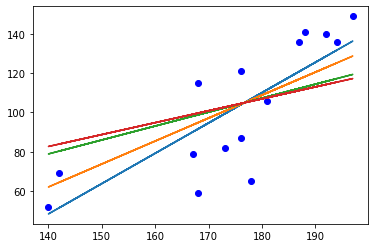

In [50]:
x_data = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x_data])

I = np.identity(2)
alphas = [0.01, 0.1, 1, 10]

# add 1-3 line of code here
plt.scatter(x_data, y, color='b')
# add 1-3 lines to compare the results
for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(X=x, y=y)
    plt.plot(x_data, ridge.predict(x))
    
plt.show()


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

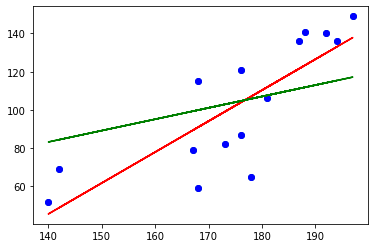

In [55]:
def sgd(x_data, y_data):
    learning_rate=0.000001
    epochs=1000
    m, n = x_data.shape
    weights = np.random.randn(n, 1)
    bias = np.zeros(1)
    
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = x_data[random_index:random_index + 1]
            yi = y_data[random_index:random_index + 1]
            
            gradients_w = 2 * xi.T.dot(xi.dot(weights) + bias - yi)
            gradients_b = 2 * (xi.dot(weights) + bias - yi).sum()
            
            weights = weights - learning_rate * gradients_w
            bias = bias - learning_rate * gradients_b
        
    return weights, bias

x_data = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1)
y_data = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1)

x_matrix = np.asmatrix(np.c_[np.ones((15,1)), x])

lasso = Lasso(alpha=0.1)
lasso.fit(x_matrix, y_data)
plt.scatter(x_data, y_data)
plt.plot(x_data, lasso.predict(x_matrix), color='r')

weights, bias = sgd(x_data, y_data)
y_pred = x_data.dot(weights) + bias
plt.plot(x_data, y_pred, color='g')
plt.scatter(x_data, y_data, color='b')

plt.show()

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

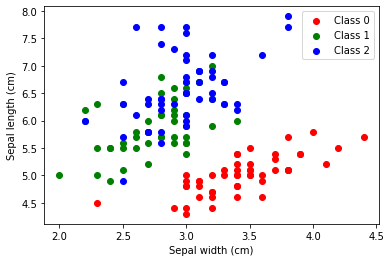

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

X = iris_df[['sepal width (cm)', 'sepal length (cm)']].values
y = iris_df['target'].values

colors = ['red', 'green', 'blue']
for target, color in zip(np.unique(y), colors):
    plt.scatter(X[y == target, 0], X[y == target, 1], color=color, label=f"Class {target}")

plt.xlabel('Sepal width (cm)')
plt.ylabel('Sepal length (cm)')
plt.legend()
plt.show()
